In [155]:
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from scripts.ETL.co2analytics import CO2Analytics
import pandas as pd

In [156]:
CO2Analytics = CO2Analytics()
CO2Analytics.run()
print('finished transforming the data')

(108, 20)
finished transforming the data


In [157]:
raw = CO2Analytics.transformed_data
raw.drop(columns=['total'], inplace=True)

In [158]:
raw.columns

Index(['sector', 'subsector', 'year', 'electricity', 'heat_and_cooling',
       'natural_gas', 'l_p_g', 'heating_oil', 'diesel', 'gasoline', 'lignite',
       'hard_coal', 'other_fossil_fuels', 'vegetable_oil', 'biofuels',
       'other_biomass', 'solar_thermal', 'geothermal', 'other'],
      dtype='object')

In [159]:
df_long = raw.melt(
    id_vars=['sector', 'subsector', 'year'],  # Columns to keep
    var_name='fuel_type',  # New column name for fuel types
    value_name='emission'  # New column name for emissions
)

In [160]:
df_long

,sector,subsector,year,fuel_type,emission
0,buildings,"municipal buildings, equipment/devices",1990-01-01,electricity,29867.0
1,buildings,"non-municipal service buildings, equipment/dev...",1990-01-01,electricity,195098.0
2,buildings,residential buildings,1990-01-01,electricity,497298.0
3,buildings,public lighting,1990-01-01,electricity,46447.0
4,buildings,industry,1990-01-01,electricity,693838.0
...,...,...,...,...,...
1723,transport,private and commercial transport,2021-01-01,other,NaN
1724,other,"agriculture, forestry, fishing",2021-01-01,other,NaN
1725,other,waste management,2021-01-01,other,12949.0
1726,other,water and wastewater management,2021-01-01,other,12265.0


In [161]:
data = df_long.copy()
data = data[data['year'].dt.year >= 2000]
data

,sector,subsector,year,fuel_type,emission
12,buildings,"municipal buildings, equipment/devices",2013-01-01,electricity,45220.0
13,buildings,"non-municipal service buildings, equipment/dev...",2013-01-01,electricity,738480.0
14,buildings,residential buildings,2013-01-01,electricity,523213.0
15,buildings,public lighting,2013-01-01,electricity,33312.0
16,buildings,industry,2013-01-01,electricity,363295.0
...,...,...,...,...,...
1723,transport,private and commercial transport,2021-01-01,other,NaN
1724,other,"agriculture, forestry, fishing",2021-01-01,other,NaN
1725,other,waste management,2021-01-01,other,12949.0
1726,other,water and wastewater management,2021-01-01,other,12265.0


In [162]:
bio_fuels = ['biofuels', 'vegetable_oil', 'other_biomass']
renewable_energy = ['solar_thermal', 'geothermal']
fossil_fuels = ['natural_gas', 'lignite', 'hard_coal', 'other_fossil_fuels', 'diesel', 'gasoline', 'l_p_g', 'heating_oil', ]

# Create a new column categorizing fuel types
def categorize_fuel_type(fuel):
    if fuel in bio_fuels:
        return 'bio'
    elif fuel in renewable_energy:
        return 'renewable'
    elif fuel in fossil_fuels:
        return 'fossil'
    else:
        return 'other'

data['fuel_category'] = data['fuel_type'].apply(categorize_fuel_type)

In [163]:
fuel_sum = data.groupby(['year', 'fuel_category'])['emission'].sum().reset_index()
sector_sum = data.groupby(['sector', 'year'])['emission'].sum().reset_index()


In [164]:
fuel_fig = px.bar(fuel_sum, x='year', y='emission', color='fuel_category', title='Emissions by Fuel Category in Each Year', barmode='stack')

fuel_fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Categories',
                    'method': 'update',
                    'args': [{'visible': [True, True, True, True]}, {'title': 'Emissions by Fuel Category in Each Year'}]
                },
                {
                    'label': 'Bio',
                    'method': 'update',
                    'args': [{'visible': [True, False, False, False]}, {'title': 'Emissions from Bio Fuel'}]
                },
                {
                    'label': 'Fossil',
                    'method': 'update',
                    'args': [{'visible': [False, True, False, False]}, {'title': 'Emissions from Fossil Fuel'}]
                },
                {
                    'label': 'Other',
                    'method': 'update',
                    'args': [{'visible': [False, False, True, False]}, {'title': 'Emissions from Other Fuels'}]
                },
                {
                    'label': 'Renewable',
                    'method': 'update',
                    'args': [{'visible': [False, False, False, True]}, {'title': 'Emissions from Renewable Fuels'}]
                }
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.17,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)
fuel_fig.show()

In [165]:
sector_fig = px.bar(sector_sum, x='year', y='emission', color='sector', title='Emissions by sectors', barmode='stack')

sector_fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Sectors',
                    'method': 'update',
                    'args': [{'visible': [True, True, True]}, {'title': 'Emissions by Sector in Each Year'}]
                },
                {
                    'label': 'Buildings',
                    'method': 'update',
                    'args': [{'visible': [True, False, False]}, {'title': 'Emissions from Bio Fuel'}]
                },
                {
                    'label': 'Other',
                    'method': 'update',
                    'args': [{'visible': [False, True, False]}, {'title': 'Emissions from Fossil Fuel'}]
                },
                {
                    'label': 'Transport',
                    'method': 'update',
                    'args': [{'visible': [False, False, True]}, {'title': 'Emissions from Other Fuels'}]
                }
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.17,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)
sector_fig.show()

In [166]:
fuel_fig.write_html('sector_sum.html')
sector_fig.write_html('fuel_sum.html')


In [170]:
buildings_data = sector_sum[sector_sum['sector'] == 'buildings']
transport_data = sector_sum[sector_sum['sector'] == 'transport']
other_data = sector_sum[sector_sum['sector'] == 'other']

[2704114.41403198 1649042.87236023   69200.28675842]


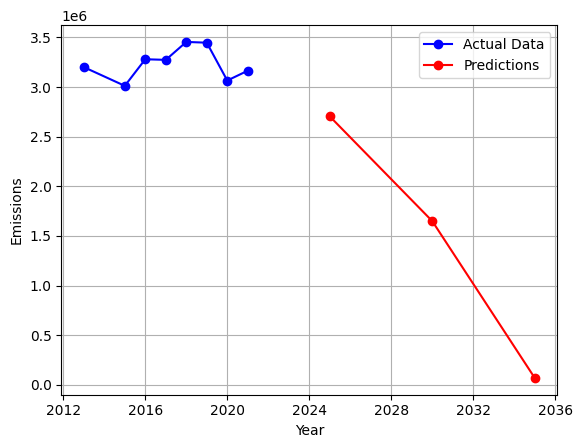

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example: Convert 'year' column from datetime to integer year if it's a date
# Assuming 'buildings_data['year']' is in datetime format
years = np.array([building.year for building in buildings_data['year']]).reshape(-1, 1)
emissions = np.array(buildings_data['emission'])

# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(years)

# Train model
model = LinearRegression()
model.fit(X_poly, emissions)

# Future dates as integers (years only)
future_dates = np.array([2025, 2030, 2035]).reshape(-1, 1)

# Transform future years for prediction
future_years_poly = poly.transform(future_dates)
predictions = model.predict(future_years_poly)

# Convert years to numpy.datetime64 for plotting
years_datetime = np.array([np.datetime64(f'{year[0]}-01-01') for year in years])
future_years_datetime = np.array([np.datetime64(f'{year[0]}-01-01') for year in future_dates])

print(predictions)  # Predicted emissions

# Plot results
plt.plot(years_datetime, emissions, 'bo-', label='Actual Data')
plt.plot(future_years_datetime, predictions, 'ro-', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.show()
